In [229]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import itertools  

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout
from keras.layers import Bidirectional, LSTM



### Loading Dataset

In [193]:
data = pd.read_csv("/home/hasan/Desktop/Code to keep on Github/Bengali Sentiment Bert/Bengal_Sentiment_Clean_Data.csv")

In [194]:
data.head()

,data,title_x,title_y,title,value,tag
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন,-1,-1,2,-1,1
1,এটা কেন হচ্ছে সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে ন...,-1,-1,-1,-1,1
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,-1,-2,-2,-5,2
3,চুরি নয় লুটপাট,-2,-2,-2,-6,2
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,0,-1,0,0,0


In [195]:
data.dtypes

data       object
title_x     int64
title_y     int64
title       int64
value       int64
tag         int64
dtype: object

### Dropping unnecessary columns

In [196]:
data = data.drop(['title_x', 'title_y', 'title', 'value'], axis=1)

In [197]:
data.head()

,data,tag
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন,1
1,এটা কেন হচ্ছে সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে ন...,1
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,2
3,চুরি নয় লুটপাট,2
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,0


### class of label data

<AxesSubplot:xlabel='tag', ylabel='count'>

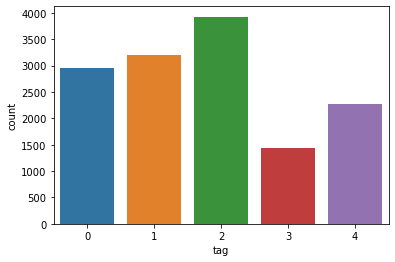

In [198]:
sns.countplot(x='tag', data=data)

### Shuffle dataset

In [199]:
data = data.reset_index(drop=True)

In [200]:
data = data.sample(frac=1).reset_index(drop=True)

In [201]:
data.head()

,data,tag
0,বিএনপির পর বর্তমান সরকার কি পরমিান লোক পাঠায়ছে,0
1,তামিম ইকবালইমরুল কায়েসসাকিব আল হাসান মুশফিকুর ...,0
2,বৈধ পথে কল কমার কারণ দুটি—অবৈধ ভিওআইপি এবং হোয়...,0
3,মি মুন্না এখনো পৃথিবীর অত্যাধুনিক শহর গুলোতে হ...,0
4,পরীক্ষা শুরুর আগেই পরীক্ষা কেন্দ্রেই প্রশ্নপত্...,4


### Feature and Label data

In [202]:
feature = data['data'].values
label = data['tag']

In [203]:
feature

array(['বিএনপির পর বর্তমান সরকার কি পরমিান লোক পাঠায়ছে',
       'তামিম ইকবালইমরুল কায়েসসাকিব আল হাসান মুশফিকুর রহিমমাহমুদউল্লাহলিটন দাসমো মিঠুনমেহেদী হাসান মিরাজসাইফউদ্দিননাজমুল ইসলাম অপু পেসস্পিন উইকেট অনুযায়ীমাশরাফি বিন মুর্তজা মোস্তাফিজুর রহমানরিজার্ভঃসৌম্য সরকার আরিফুল হক রুবেল হোসেন ও আবু হায়দার রনি',
       'বৈধ পথে কল কমার কারণ দুটি—অবৈধ ভিওআইপি এবং হোয়াটসঅ্যাপ ইমোর মতো ওভার দ্য টপ সেবা প্রথম টা বাদ দ্বিতীয়টা প্রধান কারন তাছাড়া আছে ফেসবুক মেসেন্জার ইমেইল ইত্যাদি',
       ..., 'রিদওয়ান বিবেক পুরা সাইকো',
       'খুব সুন্দর লেখা ধন্যবাদ অনুবাদককে ভিনদেশী এক তরুণীর চোখে বাংলাদেশকে নতুনভাবে আবিষ্কার করলাম',
       'নাসিরুল স্যারকে সতত শ্রদ্ধা জ্ঞাপন করছি  আরো এগিয়ে যান আপনার জন্য শুভ কামনা রইলো '],
      dtype=object)

In [204]:
label

0        0
1        0
2        0
3        0
4        4
        ..
13797    3
13798    3
13799    2
13800    4
13801    4
Name: tag, Length: 13802, dtype: int64

In [205]:
print(f"Length of feature is :{len(feature)} and length of label is :{len(label)}")

Length of feature is :13802 and length of label is :13802


### Tokenize

In [206]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(feature)

X_token = tokenizer.texts_to_sequences(feature)


In [207]:
# printing some token
tok = [print(X_token[tok]) for tok in range(5)]
tok             

[166, 98, 323, 48, 4, 15086, 213, 15087]
[876, 15088, 15089, 1416, 2076, 9909, 15090, 15091, 15092, 2076, 15093, 812, 4729, 15094, 813, 15095, 1519, 5381, 9910, 15096, 48, 7639, 1366, 2202, 1476, 10, 1899, 4730, 4731]
[1063, 547, 858, 3459, 133, 15097, 7640, 30, 15098, 9911, 118, 1219, 4732, 3792, 598, 123, 275, 333, 9912, 491, 158, 1289, 18, 960, 15099, 3460, 657]
[1326, 7641, 274, 503, 9913, 1812, 2077, 84, 84, 7642, 7643, 7644, 1900, 2, 249, 3793, 620, 117, 165, 208, 7, 1, 1117, 7645, 84, 126, 291, 34, 35, 208, 285, 38, 1]
[380, 2583, 302, 380, 9914, 1728, 4209, 51, 1417, 10, 1901, 18, 277, 12, 2760, 40, 1418, 9, 38, 726, 180, 15100, 3461, 297, 40, 1]


[None, None, None, None, None]

In [208]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
vocab_size

36494

In [209]:
out = dict(itertools.islice(tokenizer.word_index.items(), 50))  
out

{'না': 1,
 'করে': 2,
 'আর': 3,
 'কি': 4,
 'এই': 5,
 'হবে': 6,
 'হয়': 7,
 'জন্য': 8,
 'করা': 9,
 'ও': 10,
 'যে': 11,
 'থেকে': 12,
 'কোন': 13,
 'তো': 14,
 'টাকা': 15,
 'করতে': 16,
 'আমাদের': 17,
 'আছে': 18,
 'কথা': 19,
 'এর': 20,
 'তাদের': 21,
 'দেশের': 22,
 'এখন': 23,
 'তার': 24,
 'নিয়ে': 25,
 'কিছু': 26,
 'কিন্তু': 27,
 'হয়ে': 28,
 'সব': 29,
 'এবং': 30,
 'এ': 31,
 'মনে': 32,
 'অনেক': 33,
 'তা': 34,
 'দিয়ে': 35,
 'আমরা': 36,
 'কেন': 37,
 'যায়': 38,
 'একটা': 39,
 'এটা': 40,
 'সাথে': 41,
 'তারা': 42,
 'হচ্ছে': 43,
 'পারে': 44,
 'নেই': 45,
 'বলে': 46,
 'ভালো': 47,
 'সরকার': 48,
 'নয়': 49,
 'নাই': 50}

### Some text and token

In [210]:
for i in range(5):
    print(feature[i])
    print(X_token[i])

বিএনপির পর বর্তমান সরকার কি পরমিান লোক পাঠায়ছে
[166, 98, 323, 48, 4, 15086, 213, 15087]
তামিম ইকবালইমরুল কায়েসসাকিব আল হাসান মুশফিকুর রহিমমাহমুদউল্লাহলিটন দাসমো মিঠুনমেহেদী হাসান মিরাজসাইফউদ্দিননাজমুল ইসলাম অপু পেসস্পিন উইকেট অনুযায়ীমাশরাফি বিন মুর্তজা মোস্তাফিজুর রহমানরিজার্ভঃসৌম্য সরকার আরিফুল হক রুবেল হোসেন ও আবু হায়দার রনি
[876, 15088, 15089, 1416, 2076, 9909, 15090, 15091, 15092, 2076, 15093, 812, 4729, 15094, 813, 15095, 1519, 5381, 9910, 15096, 48, 7639, 1366, 2202, 1476, 10, 1899, 4730, 4731]
বৈধ পথে কল কমার কারণ দুটি—অবৈধ ভিওআইপি এবং হোয়াটসঅ্যাপ ইমোর মতো ওভার দ্য টপ সেবা প্রথম টা বাদ দ্বিতীয়টা প্রধান কারন তাছাড়া আছে ফেসবুক মেসেন্জার ইমেইল ইত্যাদি
[1063, 547, 858, 3459, 133, 15097, 7640, 30, 15098, 9911, 118, 1219, 4732, 3792, 598, 123, 275, 333, 9912, 491, 158, 1289, 18, 960, 15099, 3460, 657]
মি মুন্না এখনো পৃথিবীর অত্যাধুনিক শহর গুলোতে হাজার হাজার ইঁদুর তেলাপোকা ছারপোকা বসবাস করে তাতে নাগরিকদের ক্ষতি ছাড়া লাভ কিছুই হয় না সুতরাং সংখ্যাটা হাজার নাকি লাখ তা দিয়ে কিছুই আসে যায় ন

### pad sequence

In [211]:
maxlen = 100
X_pad = pad_sequences(X_token, padding='post', maxlen=maxlen)

In [212]:
print(f"Shape of X_pad is :{X_pad.shape} and Shape of label is {label.shape}")

Shape of X_pad is :(13802, 100) and Shape of label is (13802,)


### Making DataFrame

In [213]:
df = pd.DataFrame(X_pad)
df.shape

(13802, 100)

In [214]:
label.shape

(13802,)

### Dividing dataset

In [215]:
x_train, x_test, y_train, y_test = train_test_split(df.values, label.values, test_size=0.1, random_state=42)
print(f"Shape of x_train :{x_train.shape} Shape of xtest :{x_test.shape} Shape of ytrain :{y_train.shape} Shape of ytest{y_test.shape}")


Shape of x_train :(12421, 100) Shape of xtest :(1381, 100) Shape of ytrain :(12421,) Shape of ytest(1381,)


### MultinomialNB

In [216]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)



MultinomialNB()

In [217]:
mnb.score(x_test,y_test)


0.2179580014482259

### MultinomialNB with Hyperparameter

In [218]:
for alpha  in np.arange(0,1, .1):
    mnb_hyparamet = MultinomialNB(alpha=alpha)
    mnb_hyparamet.fit(x_train,y_train)
    scores = mnb_hyparamet.score(x_test,y_test)
    print('for alpha ={} accuracy is {}'.format(alpha, scores))

/home/hasan/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


for alpha =0.0 accuracy is 0.2179580014482259
for alpha =0.1 accuracy is 0.2179580014482259
for alpha =0.2 accuracy is 0.2179580014482259
for alpha =0.30000000000000004 accuracy is 0.2179580014482259
for alpha =0.4 accuracy is 0.2179580014482259
for alpha =0.5 accuracy is 0.2179580014482259
for alpha =0.6000000000000001 accuracy is 0.2179580014482259
for alpha =0.7000000000000001 accuracy is 0.2179580014482259
for alpha =0.8 accuracy is 0.2179580014482259
for alpha =0.9 accuracy is 0.2179580014482259


In [219]:
#with alpha=.2
mnb = MultinomialNB(alpha=.2)
mnb.fit(x_train,y_train)


MultinomialNB(alpha=0.2)

In [220]:
#printing score of the model
mnb.score(x_test,y_test)

0.2179580014482259

In [221]:
#predicting with test data
predicted = mnb.predict(x_test)
predicted

array([0, 4, 4, ..., 1, 0, 1])

### PassiveAggressiveClassifier

In [222]:
pac = PassiveAggressiveClassifier()
pac.fit(x_train,y_train)

PassiveAggressiveClassifier()

In [223]:
pac.score(x_test,y_test)

0.24547429398986242

In [224]:
predicted = pac.predict(x_test)

### classification report

In [227]:
print(classification_report(y_test,predicted))


              precision    recall  f1-score   support

           0       0.21      0.23      0.22       292
           1       0.23      0.12      0.16       333
           2       0.31      0.39      0.34       412
           3       0.20      0.03      0.06       119
           4       0.20      0.31      0.24       225

    accuracy                           0.25      1381
   macro avg       0.23      0.22      0.20      1381
weighted avg       0.24      0.25      0.23      1381

